<a href="https://colab.research.google.com/github/wbandabarragan/quantum-mechanics-1/blob/main/python-resources/python_for_QM05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 5: Python for Quantum Mechanics

## 1D infinite-square potential:

Consider a particle of mass $m$ moving in a small space surrounded by impenetrable barriers.

The potential, $V(x)$, is given by the following piecewise function:

$   
V(x)=
     \begin{cases}
       0, & 0 \leq x \leq a\\
       \infty, & \rm elsewhere\\
     \end{cases}
$

Since $V(x)$ is time-independent, the solutions to the Schrödinger equation can be separated into spatial and temporal wave functions:

$\Psi(x,t) = \psi_n(x)\,e^{-i\frac{E_n}{\hbar}t}$

As you know, the last term is called the "wiggle factor".

**The purpose of this problem is to sketch the potential and the stationary state solutions for this system using python tools**.

First, let us remember the solutions. The wave function outside of the well is $\psi =0$ (regions I and III), while we need to solve the ODE for the particle inside the well (region II):

$\frac{-\hbar^2}{2m}\frac{d^2 \psi}{d x^2} = E\psi$

because $V(x)=0$. The solution for regions II, as we studied in class can be obtained as follows:

$\frac{d^2}{d x^2}\psi + \frac{2mE}{\hbar^2}\psi=0$

In terms of the wavenumber: $k^2=\frac{2mE}{\hbar^2}$ (eq 1.)

$\frac{d^2}{d x^2}\psi + k^2\psi=0$

Then, the solution is harmonic:

$\psi(x) = C'_1\,\cos(kx)+ C'_2\,\sin(kx)$

Now you have stationary state solutions for inside and outside of the well, but the coefficients ($C'_1$ and $C'_2$) are still undefined. The relevant boundary conditions are:

$\psi(0)=0 \Rightarrow \psi(0) = C'_1\,\cos(0)+ C'_2\,\sin(0)=0 \Rightarrow C_1'=0$

$\psi(a)=0 \Rightarrow \psi(a) = C'_1\,\cos(ka)+ C'_2\,\sin(ka)=0 \Rightarrow \sin(ka)=0$

which we can use to find an expression for $E_n$. From the equations above, we have that $ka=n\pi$, where $n$ is an integer. It cannot be zero because it results in a trivial solution. For the energy:

$$E_n=\frac{k^2\hbar^2}{2m}=\frac{n^2\pi^2\hbar^2}{2ma^2}$$

Finally we can normalise the resulting wave function, and write down the global solution. This involves calculating the integral of an analytical function.
The resulting wave function is:

$\psi(x)= C'_2\,\sin\left(\frac{n\pi}{a}x\right)$

We want to normalise it, so:

$\int^a_0|\psi(x)|^2\,dx=1$

$(C'_2)^2\,\int^a_0\sin^2\left(\frac{n\pi}{a}x\right)=1$

Therefore:
$C'_2 = \sqrt{\frac{2}{a}}$

The resulting wave function is:

$$\psi_n(x)= \sqrt{\frac{2}{a}}\,\sin\left(\frac{n\pi}{a}x\right)$$


**Tasks:**

**(a)** Use python to make a plot of $V(x)$, labelling the regions of interest (i.e., the barriers and well). **Hint:** Note that $V(x)$ is a piece-wise function that can be $+\infty$ at the barriers, so you can define very large y-values for the barriers and then chop the y-axis when plotting to show just the bottom part.

**(b)** Inside a python function, plug some ansatz and make plots of the first $4$ stationary states, $\Psi(x,0)$, at time $t=0$. **Hint:** Note that these have to be energy eigenstates.

**(c)** Now append the wiggle factor, call the above function for different times, and create a movie with $4$ panels showing how the first $4$ stationary states $\Psi(x,t)$ evolve in time. Add a time stamp to the movies.

In [4]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as ct

### a) Plot of the potential

$   
V(x)=
     \begin{cases}
       0, & 0 \leq x \leq a\\
       \infty, & \rm elsewhere\\
     \end{cases}
$

In [6]:
# Piece-wise function

def potential_v(x, a):
  """
  This is a piece-wise funtion to evaluate our potential
  Inputs: x -> vector[i]
          a -> width of the V(x)
  Ouput: V(x)
  """
  if(0 <= x <= a):
    return 0
  else:
    return 1.e4 # this is supposed to be infinity

In [8]:
# Fix some of the constants for the problem
a = 2.e-10 # 2 A, 0.2 nm
m = ct.m_e # electron mass

#print(m)

In [25]:
# Define an x axis
x = np.arange(-3.e-10, +5e-10, 1.e-12)

# Empty list for y
y = []

# Append values for y for each x[i]
for j in range(len(x)):
  y.append(potential_v(x[j], a))

# Convert to an array
y = np.array(y)

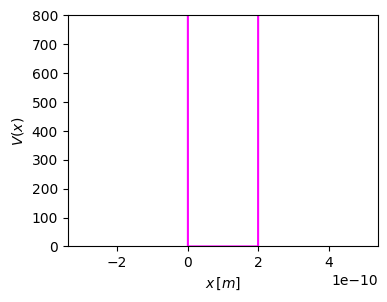

In [26]:
# Make a plot - Figure env.

plt.figure(figsize=(4,3))

plt.plot(x, y, c = "magenta", ls = "-")

plt.ylim(0,800)

plt.xlabel(r"$x\,[m]$")
plt.ylabel(r"$V(x)$")

plt.show()


(b) Wave funtion:

$$\Psi(x,t) = \psi_n(x)\,e^{-i\frac{E_n}{\hbar}t}$$

The real part is:

$$\Psi(x,t) = \psi_n(x)\,\cos\left({\frac{E_n}{\hbar}t}\right)$$

$$\psi_n(x)= \sqrt{\frac{2}{a}}\,\sin\left(\frac{n\pi}{a}x\right)$$

$$E_n=\frac{k^2\hbar^2}{2m}=\frac{n^2\pi^2\hbar^2}{2ma^2}$$

In [27]:
# Let's define a single funtion for Psi(x,t)

def psi_function(a, n, x, t):
  """
  This is the function to retrieve the stationary state solutions for the particle in a box problem
  Inputs: a, n, x, t
  Output: psi_xt
  """
  # Let's define the energies
  e_n = ((n**2)*(np.pi)**2*(ct.hbar**2))/((2)*(m)*(a**2))

  # We want the wavefunction
  psi_xt = np.sqrt(2/a)*np.sin(n*np.pi*x/a)*np.cos(e_n*t/ct.hbar)

  return psi_xt



In [28]:
# Test the code by calling our function

# Fixing the parameters
n_1 = 1
n_2 = 2
n_3 = 3
n_4 = 4
t = 0.

# Call our function
psi_1 = psi_function(a, n_1, x, t)
psi_2 = psi_function(a, n_2, x, t)
psi_3 = psi_function(a, n_3, x, t)
psi_4 = psi_function(a, n_4, x, t)

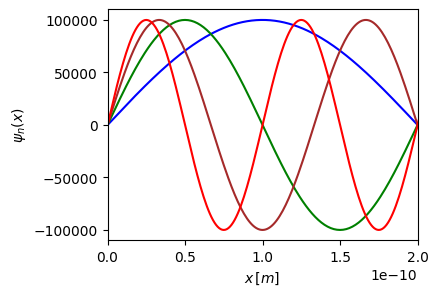

In [30]:
# Make a plot of psi_1

plt.figure(figsize=(4,3))

plt.plot(x, psi_1, c = "blue")
plt.plot(x, psi_2, c = "green")
plt.plot(x, psi_3, c = "brown")
plt.plot(x, psi_4, c = "red")

plt.xlim(0, 2e-10) # Inside of the box

plt.xlabel(r"$x\,[m]$")
plt.ylabel(r"$\psi_n(x)$")

plt.show()
